In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping,ModelCheckpoint


from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [ ]:
def make_wordcloud(df):
    comment_words=""
    for val in df.tweet:
        val = str(val).lower()


        comment_words += " ".join(val)+" "
    print(comment_words[0:100])
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,min_font_size = 10).generate(comment_words)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [ ]:
def check(text):
    test=[clean_text(text)]
    # print(test)
    seq = load_tokenizer.texts_to_sequences(test)
    padded = sequence.pad_sequences(seq, maxlen=300)
    # print(seq)
    pred = load_model.predict(padded)
    # print("pred", pred)
    if pred<0.5:
        return("no hate")
    else:
        return("hate and Offensive")

In [ ]:
df_twitter=pd.read_csv("HateSpeech/train.csv")
df_twitter

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


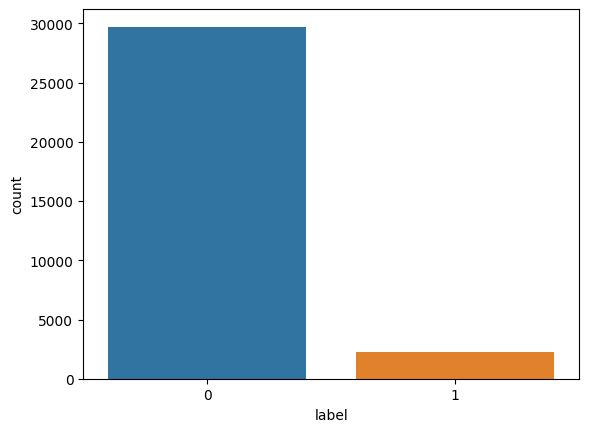

In [ ]:
sns.countplot(data=df_twitter, x='label')
plt.show()

In [ ]:
df_twitter.drop('id',axis=1,inplace=True)

In [ ]:
df_offensive=pd.read_csv("HateSpeech/labeled_data.csv")

FileNotFoundError: ignored

In [ ]:
df_offensive.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

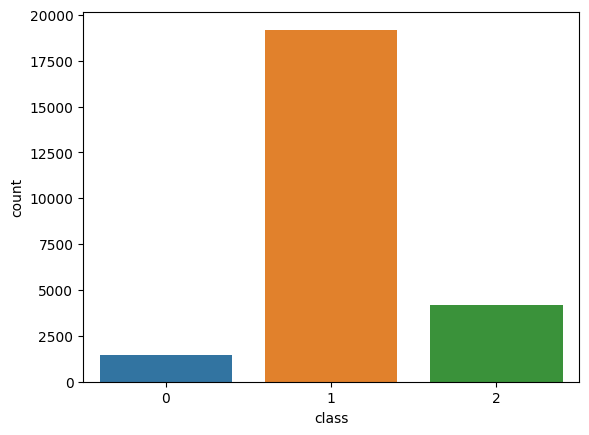

In [ ]:
# sns.countplot('class',data=df_offensive)
sns.countplot(data=df_offensive, x='class')
plt.show()

In [ ]:
print(df_offensive[df_offensive['class']==1])
print("____________________________________________")
df_offensive[df_offensive['class']==0]

       class                                              tweet
1          1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2          1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3          1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4          1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5          1  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...
...      ...                                                ...
24774      1  you really care bout dis bitch. my dick all in...
24775      1   you worried bout other bitches, you need me for?
24778      1  you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24780      1  young buck wanna eat!!.. dat nigguh like I ain...
24781      1              youu got wild bitches tellin you lies

[19190 rows x 2 columns]
____________________________________________


,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [ ]:
df_offensive["class"].replace({0: 1}, inplace=True)


In [ ]:
print(df_offensive[df_offensive['class']==1])
print("____________________________________________")
df_offensive[df_offensive['class']==0]

       class                                              tweet
1          1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2          1  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3          1  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4          1  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5          1  !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just...
...      ...                                                ...
24776      1                                 you're all niggers
24777      1  you're such a retard i hope you get type 2 dia...
24778      1  you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24780      1  young buck wanna eat!!.. dat nigguh like I ain...
24781      1              youu got wild bitches tellin you lies

[20620 rows x 2 columns]
____________________________________________


,class,tweet


In [ ]:
df_offensive['class'].unique()


array([2, 1])

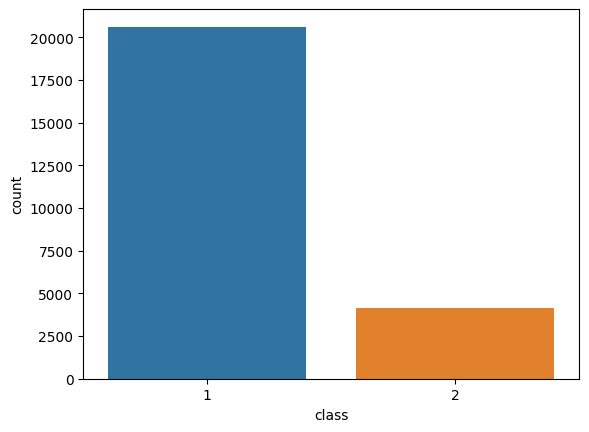

In [ ]:
sns.countplot(data=df_offensive, x='class')
plt.show()

In [ ]:
df_offensive["class"].replace({2: 0}, inplace=True)

<Axes: xlabel='class', ylabel='count'>

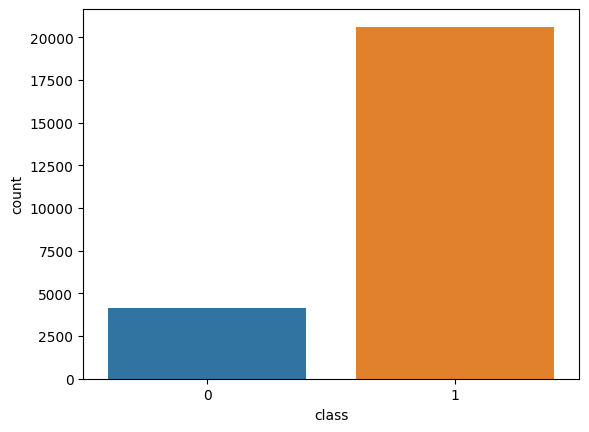

In [ ]:
sns.countplot(data=df_offensive,x='class')

In [ ]:
df_offensive.rename(columns ={'class':'label'}, inplace = True)

In [ ]:
frame=[df_twitter,df_offensive]
df = pd.concat(frame)

In [ ]:
df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


<Axes: xlabel='label', ylabel='count'>

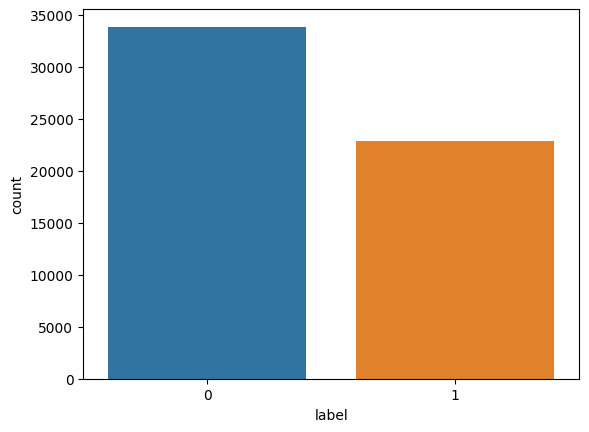

In [ ]:
sns.countplot(data=df, x='label')

In [ ]:
df

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [ ]:
df['tweet']=df['tweet'].apply(clean_text)
df

,label,tweet
0,0,user father dysfunct selfish drag kid dysfunc...
1,0,user user thank lyft credit cant use caus dont...
2,0,bihday majesti
3,0,model love u take u time urð± ððð...
4,0,factsguid societi motiv
...,...,...
24778,1,yous muthafin lie coreyemanuel right tl tras...
24779,0,youv gone broke wrong heart babi drove redneck...
24780,1,young buck wanna eat dat nigguh like aint fuck...
24781,1,youu got wild bitch tellin lie


In [ ]:
df.to_csv('test.csv',index=False)


In [ ]:
df

,label,tweet
0,0,user father dysfunct selfish drag kid dysfunc...
1,0,user user thank lyft credit cant use caus dont...
2,0,bihday majesti
3,0,model love u take u time urð± ððð...
4,0,factsguid societi motiv
...,...,...
24778,1,yous muthafin lie coreyemanuel right tl tras...
24779,0,youv gone broke wrong heart babi drove redneck...
24780,1,young buck wanna eat dat nigguh like aint fuck...
24781,1,youu got wild bitch tellin lie


In [ ]:
# make_wordcloud(df[df['label']==0])
df.to_csv('testing.csv',index=False)
df

,label,tweet
0,0,user father dysfunct selfish drag kid dysfunc...
1,0,user user thank lyft credit cant use caus dont...
2,0,bihday majesti
3,0,model love u take u time urð± ððð...
4,0,factsguid societi motiv
...,...,...
24778,1,yous muthafin lie coreyemanuel right tl tras...
24779,0,youv gone broke wrong heart babi drove redneck...
24780,1,young buck wanna eat dat nigguh like aint fuck...
24781,1,youu got wild bitch tellin lie


In [ ]:
x=df['tweet']
y=df['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

42558 42558
14187 14187


In [ ]:
print(x_train)
print(y_train)
print()
print(x_test)
print(y_test)

24029    pictur galleri  live blackcavali caucasian   w...
769                        shoutout everybodi follow nicca
8305             user user  bet put second goal   bottler 
2848     tattoosleev   gorilla simul need adapt environ...
12998                             boy ryanbowersob got hoe
                               ...                        
22381    ummmso happi fairi appar took crap twitter mad...
6196        ivanrabago least put caption steal pic fag lol
860      black professor make assumpt entir race whilst...
15795    lgbtqhatetrumppay total liber trash   amp path...
24460                                   sorri wrong bitch 
Name: tweet, Length: 42558, dtype: object
24029    0
769      1
8305     0
2848     0
12998    1
        ..
22381    1
6196     1
860      1
15795    0
24460    1
Name: label, Length: 42558, dtype: int64

12238    kim k alright honest mani nigga id rather mile...
14377    rt bigjonbul star wink know smile see two love...
17207    rt sassymermaidxo  

In [ ]:
count = CountVectorizer(stop_words='english', ngram_range=(1,5))
x_train_vectorizer=count.fit_transform(x_train)
x_train_vectorizer.toarray()

In [ ]:
x_test_vectorizer=count.transform(x_test)
x_test_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
tfidf = TfidfTransformer() #term frequency - inverse document frequency
# convert collection of text documents into numerical features
x_train_tfidf = tfidf.fit_transform(x_train_vectorizer)

x_train_tfidf.toarray()
x_test_tfidf = tfidf.transform(x_test_vectorizer)


In [ ]:
model_vectorizer= MultinomialNB().fit(x_train_vectorizer, y_train)
prediction_vectorizer=model_vectorizer.predict(x_test_vectorizer)
print(confusion_matrix(y_test,prediction_vectorizer))
print (classification_report(y_test, prediction_vectorizer))

[[7878  575]
 [ 458 5276]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      8453
           1       0.90      0.92      0.91      5734

    accuracy                           0.93     14187
   macro avg       0.92      0.93      0.92     14187
weighted avg       0.93      0.93      0.93     14187



In [ ]:
model_tfidf= MultinomialNB().fit(x_train_tfidf, y_train)
prediction_tfidf=model_tfidf.predict(x_test_tfidf)
print (classification_report(y_test, prediction_tfidf))
print(confusion_matrix(y_test,prediction_tfidf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8453
           1       0.95      0.85      0.90      5734

    accuracy                           0.92     14187
   macro avg       0.93      0.91      0.92     14187
weighted avg       0.92      0.92      0.92     14187

[[8213  240]
 [ 860 4874]]


In [ ]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc' )

In [ ]:
xgb_model_vectorizer = xgb_model.fit(x_train_vectorizer, y_train)
xgb_predictions_vectorizer=xgb_model_vectorizer.predict(x_test_vectorizer)
print(confusion_matrix(y_test,xgb_predictions_vectorizer))
print (classification_report(y_test, xgb_predictions_vectorizer))

[[8365   88]
 [ 926 4808]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8453
           1       0.98      0.84      0.90      5734

    accuracy                           0.93     14187
   macro avg       0.94      0.91      0.92     14187
weighted avg       0.93      0.93      0.93     14187



In [ ]:
xgb_model = xgb_model.fit(x_train_tfidf, y_train)
xgb_predictions=xgb_model.predict(x_test_tfidf)
print(confusion_matrix(y_test,xgb_predictions))
print (classification_report(y_test, xgb_predictions))

[[8357   96]
 [ 933 4801]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8453
           1       0.98      0.84      0.90      5734

    accuracy                           0.93     14187
   macro avg       0.94      0.91      0.92     14187
weighted avg       0.93      0.93      0.93     14187



In [ ]:
max_words = 50000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train) #build vocabulary from the text data
sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 300, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5080501 (19.38 MB)
Trainable params: 5080501 (19.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
stop = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=5
)
checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history=model.fit(sequences_matrix,y_train,batch_size=1024,epochs=8,
          validation_split=0.1,callbacks=[stop,checkpoint])

Epoch 1/8
38/38 [==============================] - 316s 8s/step - loss: 0.6268 - accuracy: 0.6485 - val_loss: 0.4501 - val_accuracy: 0.8743
Epoch 2/8
38/38 [==============================] - 296s 8s/step - loss: 0.3420 - accuracy: 0.8842 - val_loss: 0.2535 - val_accuracy: 0.9168
Epoch 3/8
38/38 [==============================] - 294s 8s/step - loss: 0.2205 - accuracy: 0.9251 - val_loss: 0.1951 - val_accuracy: 0.9354
Epoch 4/8
38/38 [==============================] - 293s 8s/step - loss: 0.1709 - accuracy: 0.9407 - val_loss: 0.1801 - val_accuracy: 0.9373
Epoch 5/8
38/38 [==============================] - 291s 8s/step - loss: 0.1432 - accuracy: 0.9509 - val_loss: 0.1740 - val_accuracy: 0.9438
Epoch 6/8
38/38 [==============================] - 290s 8s/step - loss: 0.1248 - accuracy: 0.9585 - val_loss: 0.1883 - val_accuracy: 0.9441
Epoch 7/8
38/38 [==============================] - 293s 8s/step - loss: 0.1129 - accuracy: 0.9621 - val_loss: 0.1790 - val_accuracy: 0.9422
Epoch 8/8
38/38 [===

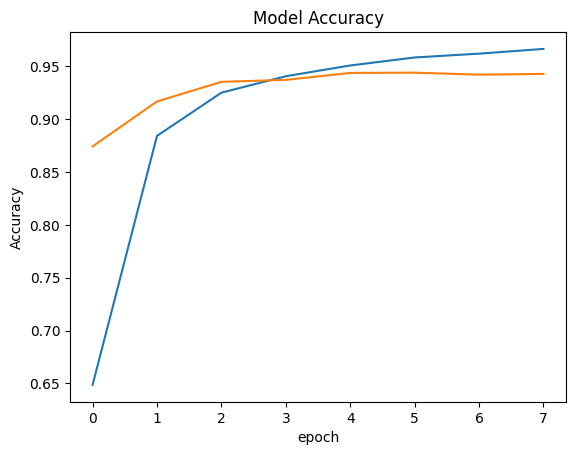

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
#plt.legend(['train'],loc='upper left')
plt.show()

In [ ]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
accruracyCheck = model.evaluate(test_sequences_matrix,y_test)

444/444 [==============================] - 68s 154ms/step - loss: 0.1762 - accuracy: 0.9418


In [ ]:
lstm_prediction=model.predict(test_sequences_matrix)

444/444 [==============================] - 51s 113ms/step


In [ ]:
res=[]
for prediction in lstm_prediction:
    if prediction[0]<0.5:
        res.append(0)
    else:
        res.append(1)
print(confusion_matrix(y_test,res))

[[8215  238]
 [ 587 5147]]


In [ ]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
model.save("hate&abusive_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import keras
load_model=keras.models.load_model("./hate&abusive_model.h5")
with open('tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [ ]:
test1 = 'YOU LOOK\S %S  FUCKING UGLY'
print(test1,"=>", check(test1),"\n")

test2= 'u r great'
print(test2,"=>", check(test2),"\n")

test3 = 'you look ReALLy ShittY ToDaY'
print(test3,"=>", check(test3),"\n")

test4 = 'you * look % like a $@% dumb MonKey '
print(test4,"=>", check(test4),"\n")

test3 = 'What a bitch u r'
print(test3,"=>", check(test3),"\n")

test3 = 'Don\'t be ashamed of yourself '
print(test3,"=>", check(test3),"\n")

1/1 [==============================] - 0s 56ms/step
YOU LOOK\S %S  FUCKING UGLY => hate and Offensive 

1/1 [==============================] - 0s 74ms/step
u r great => no hate 

1/1 [==============================] - 0s 63ms/step
you look ReALLy ShittY ToDaY => no hate 

1/1 [==============================] - 0s 64ms/step
you * look % like a $@% dumb MonKey  => hate and Offensive 

1/1 [==============================] - 0s 65ms/step
What a bitch u r => hate and Offensive 

1/1 [==============================] - 0s 58ms/step
Don't be ashamed of yourself  => no hate 



In [ ]:

print("veryBad","=>", check(test3),"\n")

NameError: ignored